In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import math
import sklearn
from sklearn.metrics import accuracy_score, log_loss
from sklearn.datasets import make_blobs, make_circles
from tqdm import tqdm

In [2]:
def init(n0,n1,n2):
    """
    
    """
    W1 = np.random.randn(n1, n0)
    b1 = np.zeros((n1, 1))
    W2 = np.random.randn(n2, n1)
    b2 = np.zeros((n2, 1))
    return {"W1":W1,"b1":b1,"W2":W2,"b2":b2}

In [3]:
#Sigmoid function
def sigmoid(z):
    """
    Compute the sigmoid of z

    Args:
        z (ndarray): A scalar, numpy array of any size.

    Returns:
        g (ndarray): sigmoid(z), with the same shape as z
         
    """ 
    g = 1/(1+np.exp(-z))
    return g

In [4]:
def forward_propagation(X, parameters):
    """
    
    """
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    Z1 = W1.dot(X) + b1
    A1 = sigmoid(Z1)

    Z2 = W2.dot(A1) + b2
    A2 = sigmoid(Z2)

    activations = {
        'A1': A1,
        'A2': A2
    }

    return activations

In [61]:
def back_propagation(X, y, parameters, activations):
    """
    """
    A1 = activations['A1']
    A2 = activations['A2']
    W2 = parameters['W2']

    m = y.shape[1]

    dZ2 = A2 - y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2, axis=1, keepdims = True)

    dZ1 = np.dot(W2.T, dZ2) * (1 - A1*A1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1, axis=1, keepdims = True)

    gradients = {
        'dW1' : dW1,
        'db1' : db1,
        'dW2' : dW2,
        'db2' : db2
    }
    
    return gradients

In [62]:
def update(gradients, parameters, learning_rate):
    """
    """
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']

    dW1 = gradients['dW1']
    db1 = gradients['db1']
    dW2 = gradients['dW2']
    db2 = gradients['db2']

    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2

    parameters = {
        'W1': W1,
        'b1': b1,
        'W2': W2,
        'b2': b2
    }

    return parameters

In [63]:
def predict(parameters,X):
    """
    X: vector of features or matrix for miltuple predections
    parameters: W1,b1,W2,b2
    """
    activations = forward_propagation(X, parameters)
    A2 = activations['A2']
    return A2 >= 0.5

In [64]:
def train_neural_network(X, y, n1=32, learning_rate = 0.1, n_iter = 1000):
    """
    X: vector of features or matrix for miltuple predections
    y: target values
    n1: number of neurones in the first hidden layer 
    
    """
    # initialisation of params
    n0 = X.shape[0] # number of features (input layer)
    n2 = y.shape[0] # number of neurones in the output layer
    np.random.seed(0)
    parameters = init(n0, n1, n2)

    train_loss = []
    train_acc = []
    history = []

    # gradient descent
    for i in tqdm(range(n_iter)):
        activations = forward_propagation(X, parameters)
        A2 = activations['A2']

        # Plot learning 
        train_loss.append(log_loss(y.flatten(), A2.flatten()))
        y_pred = predict( parameters,X)
        train_acc.append(accuracy_score(y.flatten(), y_pred.flatten()))
        
        history.append([parameters.copy(), train_loss, train_acc, i])

        # update
        gradients = back_propagation(X, y, parameters, activations)
        parameters = update(gradients, parameters, learning_rate)


    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(train_loss, label='train loss')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(train_acc, label='train acc')
    plt.legend()
    plt.show()
    
    print(train_loss[-1])
    
    return parameters

dimensions de X: (2, 200)
dimensions de y: (200,)


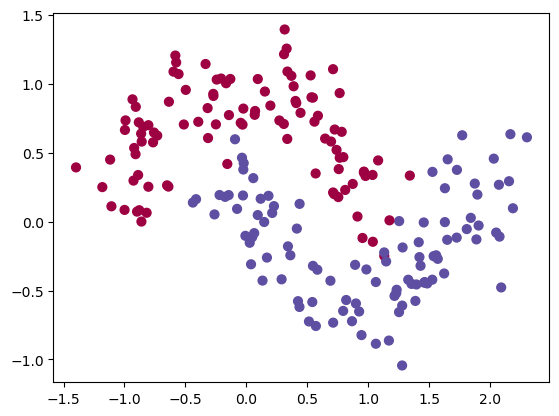

In [65]:
X, y = sklearn.datasets.make_moons(200, noise=0.20)

X = X.T
Y = y.reshape((1, y.shape[0]))

print('dimensions de X:', X.shape)
print('dimensions de y:', y.shape)
plt.scatter(X[0,:], X[1,:], s=40, c=Y, cmap=plt.cm.Spectral)
plt.show()

100%|████████████████████████████████████████████████████████████████████████████████| 100000/100000 [02:32<00:00, 657.57it/s]


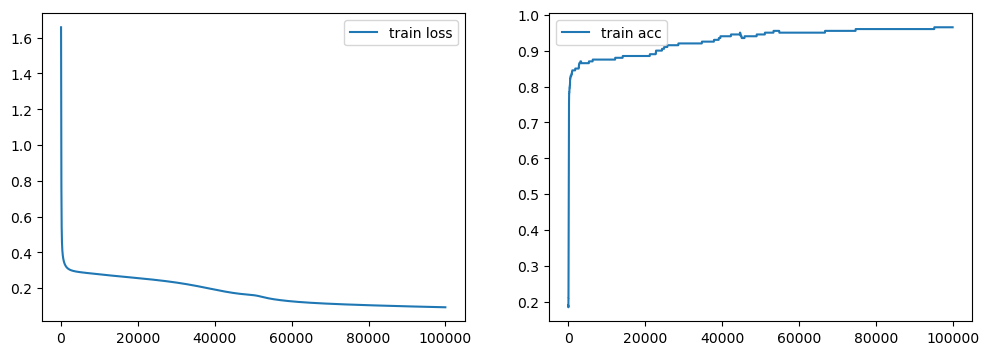

0.09318910494010098


In [66]:
#Train the model
params = train_neural_network(X, Y, n1=32,learning_rate=0.01,n_iter=100000)

In [56]:
def plot_decision_boundary(pred_function,X, Y):
    """
    
    """
    
    xx, yy = np.meshgrid( np.linspace(X[0,:].min(), X[0,:].max(), 100), np.linspace(X[1,:].min(), X[1,:].max(), 100))
    Z = pred_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[0,:], X[1,:], s=40, c=Y, cmap=plt.cm.Spectral)

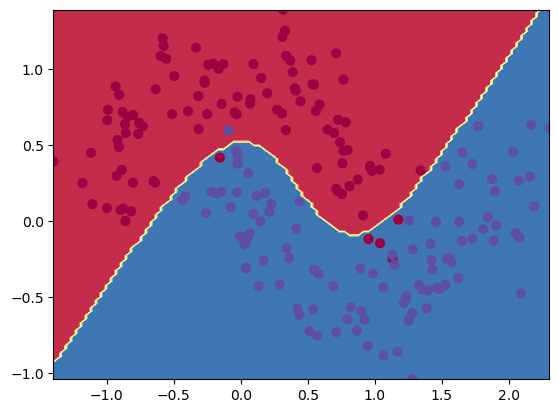

In [57]:
plot_decision_boundary(lambda x: predict(params, x.T),X,Y)